In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df = df.replace('?',np.nan)

In [6]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df = df[df['native-country'] == 'United-States']

In [9]:
df[df['native-country'] == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [10]:
# which personal factors have the highest impact on an individual's annual income in the US?

In [11]:
df = df.drop(columns = ['workclass','capital-gain','capital-loss','fnlwgt'])

In [12]:
df.occupation.value_counts()

Exec-managerial      5606
Prof-specialty       5506
Craft-repair         5503
Adm-clerical         5140
Sales                5078
Other-service        4183
Machine-op-inspct    2561
Transport-moving     2184
Handlers-cleaners    1808
Tech-support         1328
Farming-fishing      1305
Protective-serv       922
Priv-house-serv       154
Armed-Forces           14
Name: occupation, dtype: int64

In [13]:
craftdf = df[(df.occupation == 'Craft-repair') & (df['hours-per-week'] == 40)]
craftdf

,age,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
39,20,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,40,United-States,<=50K
56,63,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
111,28,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
116,46,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
131,24,HS-grad,9,Never-married,Craft-repair,Unmarried,Black,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48784,47,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
48796,66,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
48798,36,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
48799,57,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K


In [14]:
len(craftdf[craftdf.income == '>50K']) / len(craftdf)

0.2165525824517735

Text(0.5, 1.0, 'Craft-repair annual salary Count')

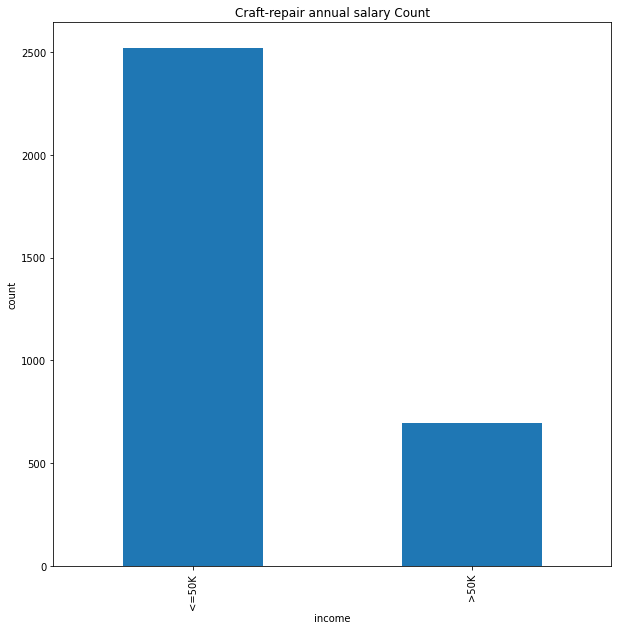

In [15]:
craftdf.income.value_counts().plot(kind = 'bar', figsize = (10,10))
plt.xlabel('income')
plt.ylabel('count')
plt.title('Craft-repair annual salary Count')

# 21% of Craftsmen that work 40H a week make more than 50K

Text(0, 0.5, 'Count')

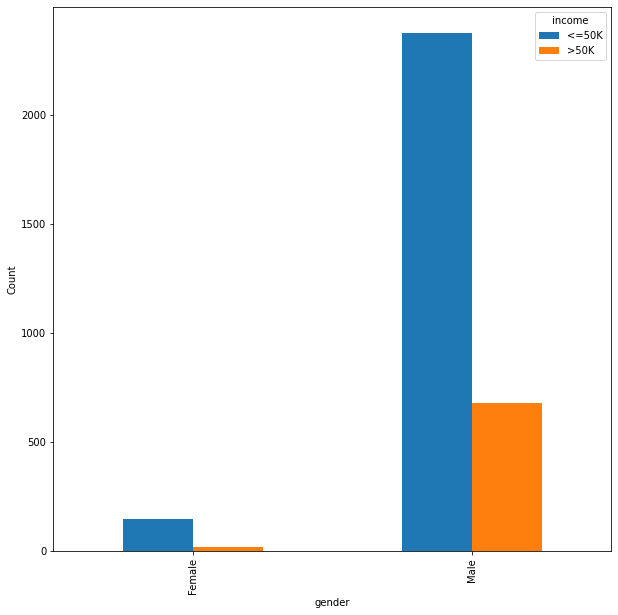

In [16]:
x = craftdf[['gender','income']]
x.pivot_table(index = 'gender', columns = 'income', values = 'income', aggfunc = 'size').plot(kind = 'bar', figsize = (10,10))
plt.ylabel('Count')

Text(0, 0.5, 'Count')

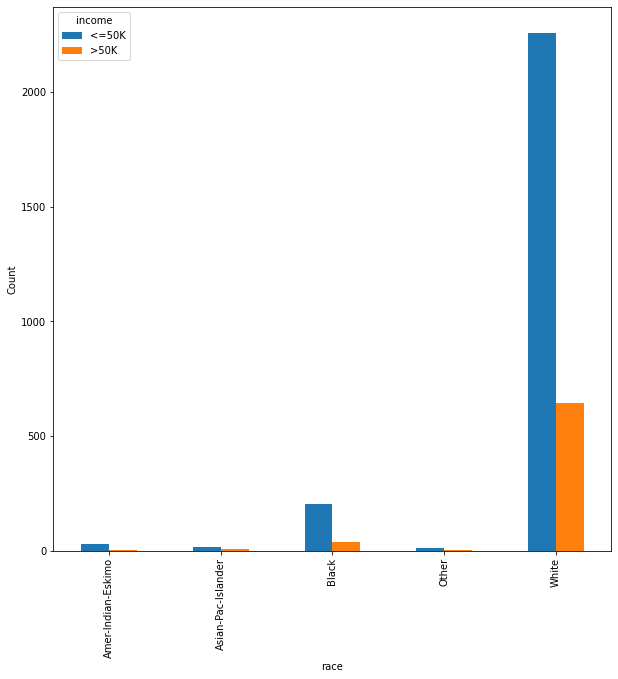

In [17]:
x = craftdf[['race','income']]
x.pivot_table(index = 'race', columns = 'income', values = 'income', aggfunc = 'size').plot(kind = 'bar', figsize = (10,10))
plt.ylabel('Count')

Text(0, 0.5, 'Count')

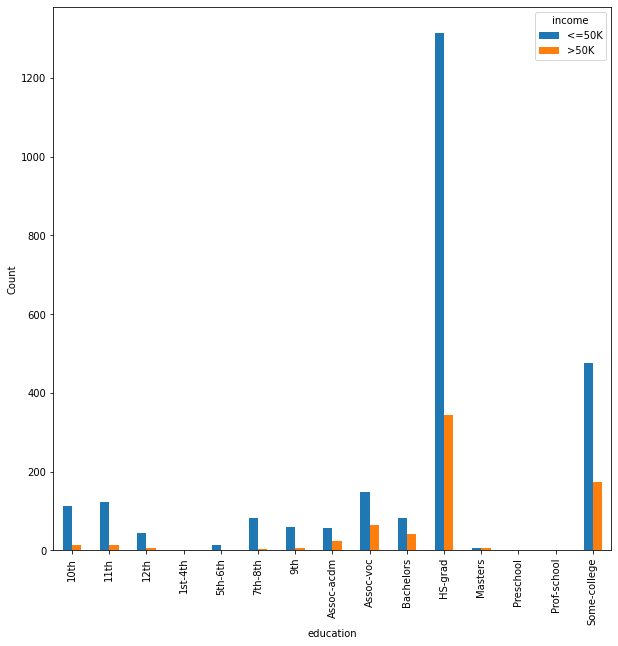

In [43]:
x = craftdf[['education','income']]
x.pivot_table(index = 'education', columns = 'income', values = 'income', aggfunc = 'size').plot(kind = 'bar', figsize = (10,10))
plt.ylabel('Count')

Text(0, 0.5, 'Count')

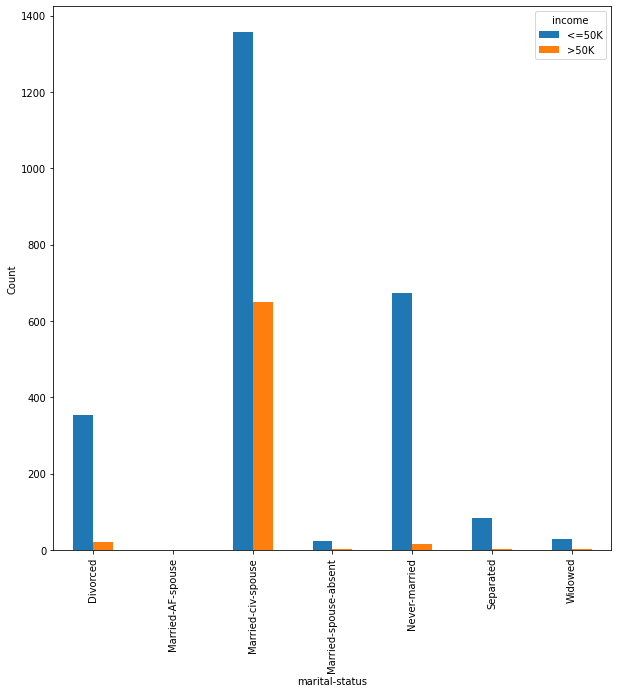

In [19]:
x = craftdf[['marital-status','income']]
x.pivot_table(index = 'marital-status', columns = 'income', values = 'income', aggfunc = 'size').plot(kind = 'bar', figsize = (10,10))
plt.ylabel('Count')

# There are large differences in income for those that are Divorced and Never-married. 
# Marital status seems to heavily affect income.

Text(0, 0.5, 'Count')

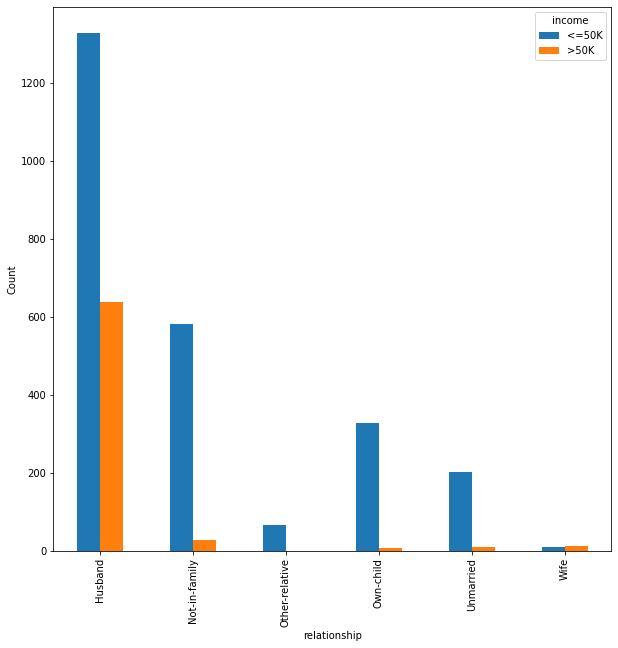

In [20]:
x = craftdf[['relationship','income']]
x.pivot_table(index = 'relationship', columns = 'income', values = 'income', aggfunc = 'size').plot(kind = 'bar', figsize = (10,10))
plt.ylabel('Count')

# Another huge difference for those who have a family vs those who do not.


Text(0.5, 0, 'age')

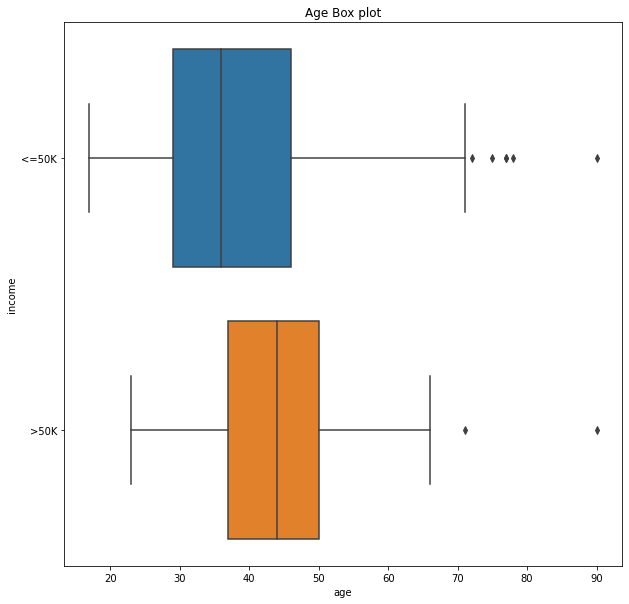

In [36]:
x = craftdf[['age','income']]
more = craftdf[craftdf['income'] == '>50K']
less = craftdf[craftdf['income'] == '<=50K']


fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('Age Box plot')
sns.boxplot(data = x, x = 'age', y = 'income')
ax.set_ylabel('income')
ax.set_xlabel('age')

# Ignoring the outliers, it looks like those who make more than 50K are older on average. Another significant difference.

In [40]:
avg = x.groupby('income').mean()
avg

,age
income,
<=50K,37.738681
>50K,43.981322


C:\Users\marsh\AppData\Local\Temp/ipykernel_3048/3010272235.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(craftdf[craftdf.income ==  '>50K']['age'],kde_kws={"label": ">50K"})
C:\Users\marsh\AppData\Local\Temp/ipykernel_3048/3010272235.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cra

<AxesSubplot: xlabel='age', ylabel='Density'>

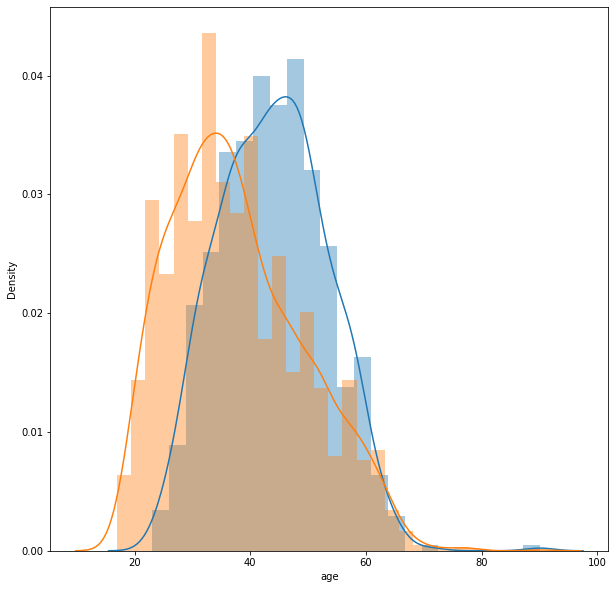

In [25]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
sns.distplot(craftdf[craftdf.income ==  '>50K']['age'],kde_kws={"label": ">50K"})
sns.distplot(craftdf[craftdf.income == '<=50K']['age'], kde_kws = {'label': "<=50K"})


<AxesSubplot: xlabel='gender', ylabel='age'>

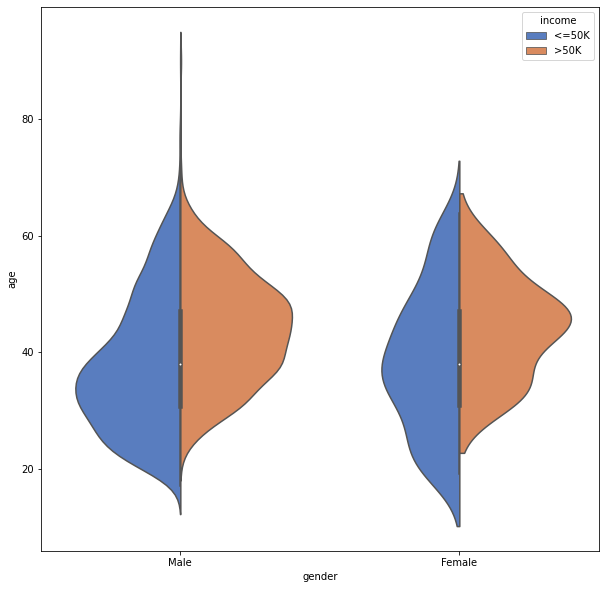

In [28]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = sns.violinplot(x="gender", y="age", hue="income",
                    data=craftdf, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

# some difference between age+ gender vs income but not too much.

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = sns.violinplot(x="gender", y="age", hue="income",
                    data=craftdf, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

<AxesSubplot: xlabel='education', ylabel='age'>

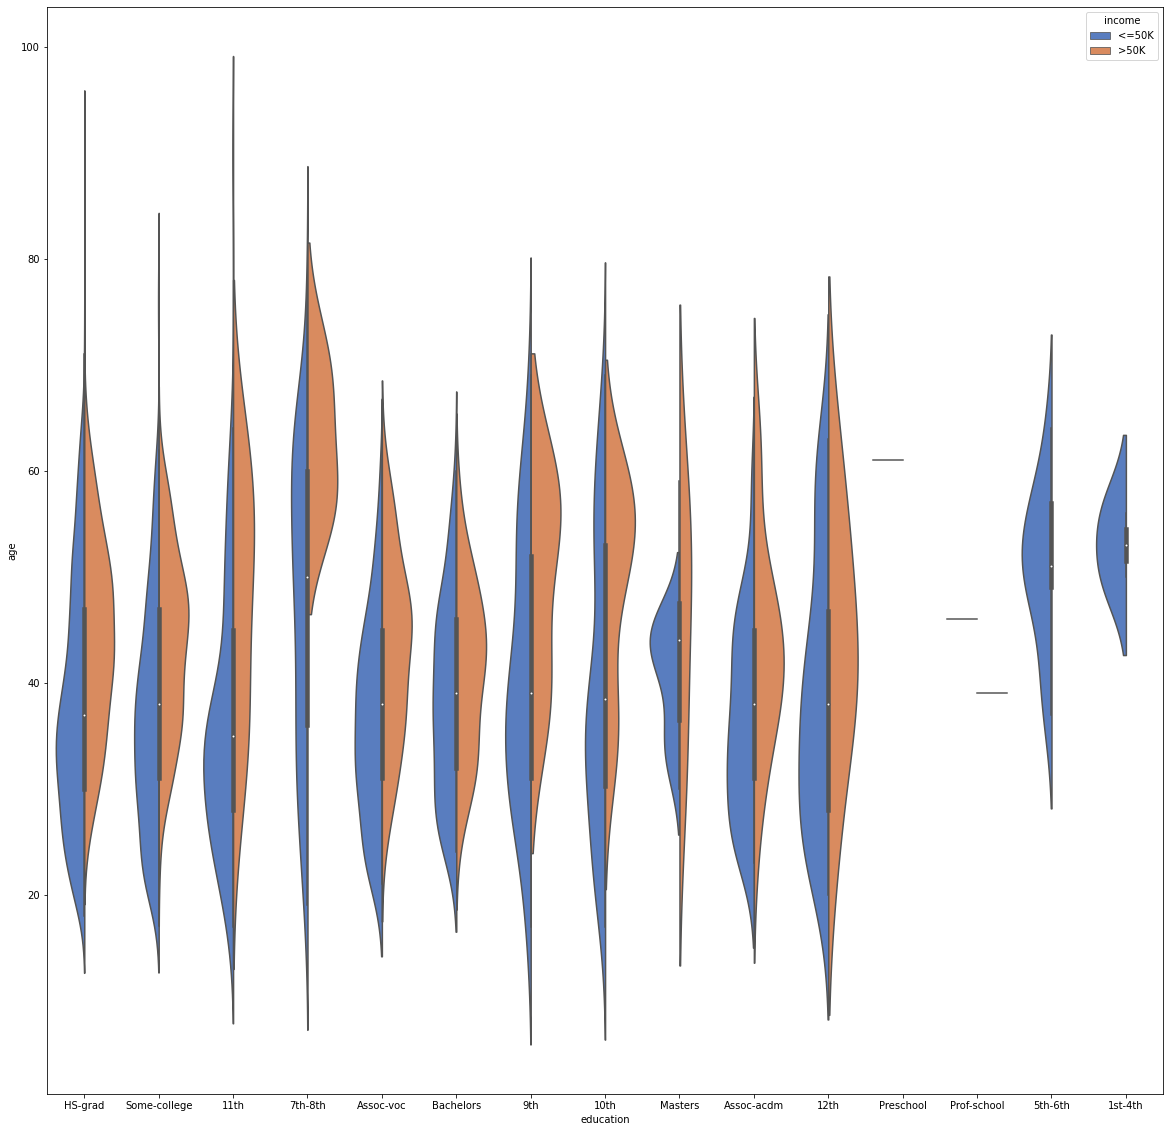

In [30]:
fig, ax = plt.subplots()
fig.set_figheight(20)
fig.set_figwidth(20)
ax = sns.violinplot(x="education", y="age", hue="income",
                    data=craftdf, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

# Those who finish without a middle school education always tend to make less than 50k.

<AxesSubplot: xlabel='marital-status', ylabel='age'>

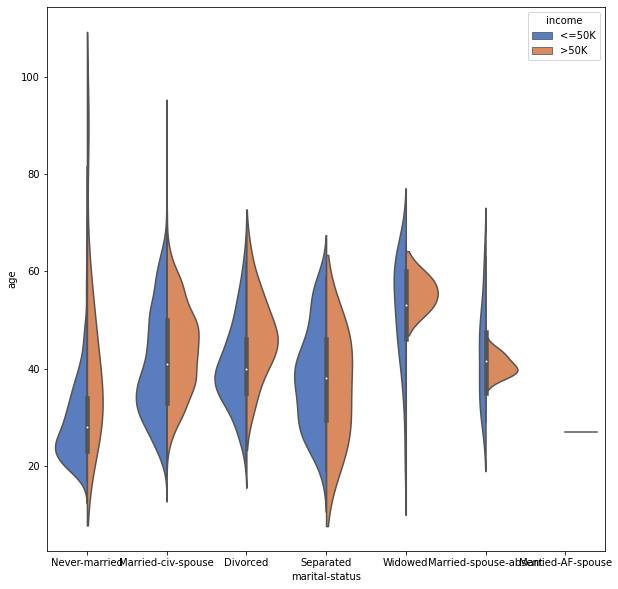

In [31]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = sns.violinplot(x="marital-status", y="age", hue="income",
                    data=craftdf, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

<AxesSubplot: xlabel='relationship', ylabel='age'>

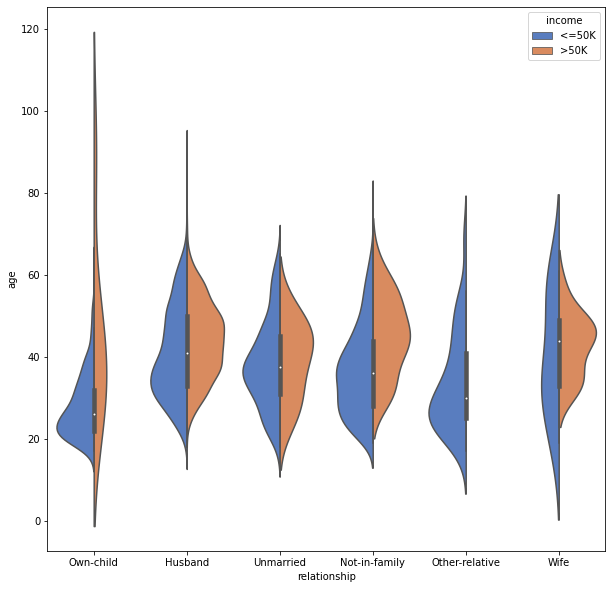

In [32]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = sns.violinplot(x="relationship", y="age", hue="income",
                    data=craftdf, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

<AxesSubplot: xlabel='race', ylabel='age'>

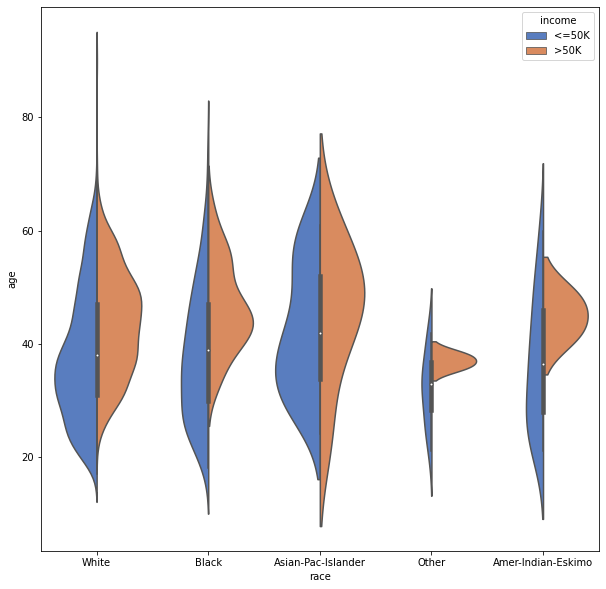

In [33]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = sns.violinplot(x="race", y="age", hue="income",
                    data=craftdf, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

In [34]:
# Judging by the plots above, it seems that the top three factors correlated with income are:

# 1. Age. On average, those who make 50K and below are 37 years old, while those who make more are 43.
# 2. Education. Those who do not finish high school are more likely to make <= 50K.
# 3. Marital status